# Project: Wrangling and Analyse data from Twitter - WeRateDogs


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analysis">Analysing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, done under the Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) program, we are going to use Python and its libraries, to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. Furthermore, we'll perform some data analysis and visualazations.

Details about data that will be used can be found [here](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/5e3db54a-1a5f-41a6-8e20-fd99f201861d)

<a id='gathering'></a>
## Data Gathering

Data gathering process will result in three (3) following files:
* **twitter_archive_enhanced.csv**: this file has been provided by Udacity and can be manually downloaded from 'resources' section fo the project part of the course.  

* **image_predictions.tsv**: this file is hosted on Udacity's servers and is downloaded programmatically using the Requests library and [this](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) URL.  

* **tweet-json.txt**: this file can be accessed by querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data. As we are encounting some technical challenges to set up as developer account on Tweetet, we are going to use the version provided by the instructor which can be manually downloaded from the course's project page.

In [69]:
### Importing needed libraries
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Reading archive data into a dataframe

In [2]:
### Reading the 'twitter-archive-enhanced.csv' file into a dataframe
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 2. Downloading image predictions data and loading it into a datframe

In [3]:
### Downloading 'image-predictions.tsv' file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resp = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(resp.content)

### Reading the file into dataframe
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
img_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 3. Reading Json data into a dataframe

In [4]:
### Extracting data of interest from 'tweet-json.txt' file

list_dict_interest_data = []

### Loading json data
with open('tweet-json.txt') as json_data:
    for line in json_data:
        data = json.loads(line)
        
### Adding needed data to the list        
        list_dict_interest_data.append({'tweet_id': data['id_str'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'full_text': data['full_text'],
                        'display_text_range': data['display_text_range']
                       })

        
tweets_data = pd.DataFrame(list_dict_interest_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 
                                                               'full_text','display_text_range'])
tweets_data.head(3)

,tweet_id,retweet_count,favorite_count,full_text,display_text_range
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"


<a id='assessing'></a>
## Assessing Data

In this section we'll visually and programatically assess the data for quality and tidness. The result of this step will be a set of issues that need to be fixed in the cleaning step.

In [5]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
tweets_data

,tweet_id,retweet_count,favorite_count,full_text,display_text_range
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]"
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"[0, 138]"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]"
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"[0, 79]"
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"[0, 138]"
5,891087950875897856,3261,20562,Here we have a majestic great white breaching ...,"[0, 138]"
6,890971913173991426,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...,"[0, 140]"
7,890729181411237888,16716,56848,When you watch your owner call another dog a g...,"[0, 118]"
8,890609185150312448,4429,28226,This is Zoey. She doesn't want to be one of th...,"[0, 122]"
9,890240255349198849,7711,32467,This is Cassie. She is a college pup. Studying...,"[0, 133]"


In [8]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
full_text             2354 non-null object
display_text_range    2354 non-null object
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


In [10]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
tweet_archive.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [13]:
tweet_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [14]:
tweet_archive.tweet_id.nunique()

2356

In [15]:
tweet_archive[~tweet_archive.tweet_id.isin(tweets_data.tweet_id)].shape[0]

2

In [16]:
tweet_archive[~tweet_archive.tweet_id.isin(img_predictions.tweet_id)].shape[0]

281

In [17]:
tweets_data.tweet_id.nunique()

2354

In [18]:
img_predictions.tweet_id.nunique()

2075

#### Quality

`tweet_archive` table
* Has rows for tweets and for retweets
* Erroneous datatypes (assigned timestamp, in_reply_to_status_id, in_reply_to_user_id column)
* There is a row with the *rating_denominator* equal to zero
* The *source* column has trailing strings
* The *name* column has erroneous values (like a, an, this, etc), some names start with Capital letter while other start with small leter. This is inconsistancy problem
* Name variable has "None" values instead of NaN

`img_predictions` table
* There are fewer tweets IDs in `img_predictions` table than in `tweet_archive` table

`tweets_data` table
* There are fewer tweets IDs in `tweets_data` table than in `tweet_archive` table

#### Tidiness

* *retweeted_status_id*, *retweeted_status_user_id* and *retweeted_status_timestamp* columns are empty if all retweets are removed from `tweet_archive` table.
* One variable __'stage'__ scarttered into four columns *doggo*, *floofer*, *pupper* and *puppo*.
* Retweet counts and favorite counts should be part `tweet_archive` table.
* Breed of dogs computed based on predictions should be part of `tweet_archive_clean` table.
* retweet_counts and favorite_counts columns from `tweets_data` table should be part of `tweet_archive_clean` table.

<a id='cleaning'></a>
## Cleaning Data

In this section we'll be writting lines of codes to fix quality and tidiness issues found in the previous section, 'Assessing Data'.

In [19]:
### Making copies of current dataframes
tweet_archive_clean = tweet_archive.copy()
img_predictions_clean = img_predictions.copy()
tweets_data_clean = tweets_data.copy()

### Has rows for tweets and for retweets

#### *Define*

The `tweet_archive_clean` table has rows for both tweets and retweets. We are going to remove 'retweets' rows, thus getting rid of duplicates.  
This operation should also reduce the number of rows in `tweet_archive_clean` not found in `tweets_data_clean` and those in `img_predictions_clean`

#### *Code*

In [20]:
### Removing retweets rows
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

#### *Test*

In [21]:
### There should be zero retweets
print('Number of retweets:', tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull() == False].shape[0])

Number of retweets: 0


In [22]:
### Checking if there is any tweet in 'tweet_archive_clean' whithout correspondance in 'tweets_data_clean'
tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(tweets_data_clean.tweet_id)].shape[0]

0

In [23]:
### Checking if there is any tweet in 'tweet_archive_clean' whithout correspondance in 'img_predictions_clean'
tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(img_predictions_clean.tweet_id)].shape[0]

181

### Erroneous rating denominator values

#### *Define*

The `tweet_archive_clean` table has a row with the *rating_denominator* equal to zero. We need to remove this row so that we can compute ratings. Otherwise it will give us an 'inf' value for that row. Also by computing ratings and put them in a column in the dataframe, we'll be able to compare them base on same scale.

#### *Code*

In [24]:
### Removing row(s) with 0 as rating denominator
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.rating_denominator != 0]

### Computing ratings
tweet_archive_clean["ratings"] = tweet_archive_clean["rating_numerator"] / tweet_archive_clean["rating_denominator"]

#### *Test*

In [25]:
### There should be 'ratings' column with calculated values
tweet_archive_clean[["rating_numerator","rating_denominator", "ratings"]].sample(5)

,rating_numerator,rating_denominator,ratings
1600,11,10,1.1
468,11,10,1.1
2150,10,10,1.0
1514,12,10,1.2
1793,9,10,0.9


In [26]:
### No 0s in'rating_denominator'
tweet_archive_clean[tweet_archive_clean.rating_denominator == 0][["rating_numerator","rating_denominator", "ratings"]]

,rating_numerator,rating_denominator,ratings


### Erroneous datatypes 

#### *Define*

In the `tweet_archive_clean` table:
* change timestamp column's data type to datetime
* change in_reply_to_status_id column's data type to int
* change in_reply_to_user_id column's data type to int

#### *Code*

In [27]:
### Converting timestamp from string to datetime datatype
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

### Replacing null values with 0s in in_reply_to_status_id and in_reply_to_user_id columns
tweet_archive_clean.in_reply_to_status_id = tweet_archive_clean.in_reply_to_status_id.fillna(0)
tweet_archive_clean.in_reply_to_user_id = tweet_archive_clean.in_reply_to_user_id.fillna(0)

### Converting in_reply_to_status_id and in_reply_to_user_id from floats to int datatypes
tweet_archive_clean.in_reply_to_status_id = tweet_archive_clean.in_reply_to_status_id.astype(np.int64)
tweet_archive_clean.in_reply_to_user_id = tweet_archive_clean.in_reply_to_user_id.astype(np.int64)

#### *Test*

In [28]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         2174 non-null int64
in_reply_to_user_id           2174 non-null int64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
ratings                       

### The source column has trailing strings

#### *Define*

In the `tweet_archive_clean` table we need to remove tags surrounding the value in the source column

#### *Code*

In [29]:
### Updating 'source' column with clean values i.e. without trailing strings
tweet_archive_clean.source = tweet_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### *Test*

In [30]:
### Displaying 'source' values and their respective number of occurences
tweet_archive_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Name variable has "None" values instead of NaN

#### *Define*

In the `tweet_archive_clean` table we need to set "None" to NaN values in the name column.

#### *Code*

In [31]:
### Replacing 'None' with a NaN
tweet_archive_clean['name'].replace('None', np.nan, inplace = True)

#### *Test*

In [32]:
### There should not be rows with 'None' value in 'name' column
tweet_archive_clean[['tweet_id','text', 'name']].query('name == "None"')

,tweet_id,text,name


### The name column has erroneous values (like a, an, this, etc)

#### *Define*

In the `tweet_archive_clean` table, replace all names that seem to be mistakes by NaN.

#### *Code*

In [33]:
### Getting seemingly erroneous names. Most of them start with lower case letters
erroneous_names = []
for name in tweet_archive_clean['name']:
    try:
        if name[0].islower() and name not in erroneous_names:
            erroneous_names.append(name)
        if len(name) < 2 and name not in erroneous_names:
            erroneous_names.append(name)
    except:
        continue
print(erroneous_names)

### Replacing erroneous names with a NaN
tweet_archive_clean['name'].replace(erroneous_names, np.nan, inplace = True)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'O', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


#### *Test*

In [34]:
### All names start with upper case letter and 'None' is replaced by 'NaN'
tweet_archive_clean['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
1616           Alfie
367            Alfie
2238           Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

### Tidiness

#### *Define*

`retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns are empty if all retweets are removed from `tweet_archive_clean` table. Therefore we need to drop them.

#### *Code*

In [35]:
### Retweets related columns are now empty, hence we need to remove them
tweet_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### *Test*

In [36]:
### Removed columns are gone
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    2174 non-null int64
in_reply_to_user_id      2174 non-null int64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1390 non-null object
doggo                    2174 non-null object
floofer                  2174 non-null object
pupper                   2174 non-null object
puppo                    2174 non-null object
ratings                  2174 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 271.8+ KB


#### One variable 'stage' scarttered into four columns doggo, floofer, pupper and puppo.

#### *Define*

A dog cannot be of more than one stage. We retrieve rows with dog having more than one stage, then look at the correct stage and fixe it manually.

#### *Code*

In [37]:
### Retrieving rows with dog having more than one stage
df = tweet_archive_clean[['tweet_id','doggo', 'floofer', 'pupper', 'puppo','text']].query('\
(doggo != "None") and ((floofer != "None") or (pupper != "None") or (puppo != "None")) or\
(floofer != "None") and ((doggo != "None") or (pupper != "None") or (puppo != "None")) or\
(pupper != "None") and ((doggo != "None") or (floofer != "None") or (puppo != "None")) or\
(puppo != "None") and ((doggo != "None") or (floofer != "None") or (pupper != "None"))')
df

,tweet_id,doggo,floofer,pupper,puppo,text
191,855851453814013952,doggo,None,None,puppo,Here's a puppo participating in the #ScienceMa...
200,854010172552949760,doggo,floofer,None,None,"At first I thought this was a shy doggo, but i..."
460,817777686764523521,doggo,None,pupper,None,"This is Dido. She's playing the lead role in ""..."
531,808106460588765185,doggo,None,pupper,None,Here we have Burke (pupper) and Dexter (doggo)...
565,802265048156610565,doggo,None,pupper,None,"Like doggo, like pupper version 2. Both 11/10 ..."
575,801115127852503040,doggo,None,pupper,None,This is Bones. He's being haunted by another d...
705,785639753186217984,doggo,None,pupper,None,This is Pinot. He's a sophisticated doggo. You...
733,781308096455073793,doggo,None,pupper,None,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
889,759793422261743616,doggo,None,pupper,None,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,751583847268179968,doggo,None,pupper,None,Please stop sending it pictures that don't eve...


In [38]:
### Printing correspondint text to figure out the correct stage of the dog.
list(df.text)

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel",
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 woul

In [39]:
### Manually setting correct stage of dog
tweet_archive_clean['doggo'][tweet_archive_clean.tweet_id.isin(["855851453814013952", "854010172552949760"])] = 'None'
tweet_archive_clean['doggo'][tweet_archive_clean.tweet_id.isin( \
                                                               ["817777686764523521", "808106460588765185", \
                                                              "802265048156610565", "801115127852503040", \
                                                              "785639753186217984", "781308096455073793", \
                                                              "759793422261743616", "751583847268179968", \
                                                              "741067306818797568", "733109485275860992"])] = 'None'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
### Making one column 'state' from the doggo, floofer, pupper and puppo columns
tweet_archive_clean['stage'] = tweet_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [41]:
### Replacing 'None' with a NaN
tweet_archive_clean['stage'].replace('None', np.nan, inplace = True)

In [42]:
### Dropping the doggo, floofer, pupper and puppo columns
tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### *Test*

In [43]:
### Listing dog stages and their corresponding occurences
tweet_archive_clean.stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: stage, dtype: int64

In [44]:
### View updated structure of the dataframe
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    2174 non-null int64
in_reply_to_user_id      2174 non-null int64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1390 non-null object
ratings                  2174 non-null float64
stage                    344 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 220.8+ KB


#### Retweet counts and favorite counts should be part of `tweets_data_clean` table.

#### *Define*

Retrieve the `retweet_count` and `favorite_count` columns from `tweets_data_clean` table and assign those values to new columns in `tweet_archive_clean` table

#### *Code*

In [45]:
### Checking if there is any tweet in 'tweet_archive_clean' whithout correspondance in 'tweets_data_clean'
tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(tweets_data_clean.tweet_id)].shape[0]

0

In [46]:
### Merging "retweet_count" and "favorite_count" columns from tweets_data_clean with twee_archive_clean dataframe
df = tweets_data_clean[["tweet_id", "retweet_count", "favorite_count"]]
df.tweet_id = df.tweet_id.astype(np.int64)
tweet_archive_clean = pd.merge(tweet_archive_clean, df, 
                      how = 'left', on = ['tweet_id'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### *Test*

In [47]:
### Checking if the merged columns are present
tweet_archive_clean[["tweet_id", "source", "retweet_count", "favorite_count"]].sample(5)

,tweet_id,source,retweet_count,favorite_count
483,799297110730567681,Twitter for iPhone,3227,11065
636,773985732834758656,Twitter for iPhone,4492,11925
81,875097192612077568,Twitter for iPhone,6342,27997
1252,697482927769255936,Twitter for iPhone,765,2662
1687,675334060156301312,Twitter for iPhone,1436,3007


In [48]:
### Looking at new structure of the dataframe
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 14 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    2174 non-null int64
in_reply_to_user_id      2174 non-null int64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1390 non-null object
ratings                  2174 non-null float64
stage                    344 non-null object
retweet_count            2174 non-null int64
favorite_count           2174 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memory usage: 254.8+ KB


#### Breed of dogs computed based on predictions should be part of tweet_archive_clean table.

#### *Define*

Retrieve prediction columns from `img_predictions_clean` table, compute the breed of dogs, keep the confidence level of the algoritm and assign those values to new columns in `tweet_archive_clean` table. Also, add other needed columns from `img_predictions_clean` table to `img_predictions_clean` table.

#### *Code*

In [49]:
### Lists to hold dog breeds and confidence level of prediction
dog_breed = []
used_algorithm = []

### Function to select dog breeds based on confidence level of prediction alogrithm
def compute_dog_breed(img_predictions_clean):
    breed = np.nan
    algorithm = np.nan
    if img_predictions_clean['p1_dog'] == True:
        breed = img_predictions_clean['p1']
        algorithm = "algorithm_1"
        if img_predictions_clean['p2_dog'] == True:
            if img_predictions_clean['p1_conf'] < img_predictions_clean['p2_conf']:
                breed = img_predictions_clean['p2']
                algorithm = "algorithm_2"
        elif img_predictions_clean['p3_dog'] == True:
            if img_predictions_clean['p1_conf'] < img_predictions_clean['p3_conf']:
                breed = img_predictions_clean['p3']
                algorithm = "algorithm_3"
    elif img_predictions_clean['p2_dog'] == True:
        breed = img_predictions_clean['p2']
        algorithm = "algorithm_2"
        if img_predictions_clean['p3_dog'] == True:
            if img_predictions_clean['p2_conf'] < img_predictions_clean['p3_conf']:
                breed = img_predictions_clean['p3']
                algorithm = "algorithm_3"
    elif img_predictions_clean['p3_dog'] == True:
        breed = img_predictions_clean['p3']
        algorithm = "algorithm_3"
    else:
        breed = "Not a dog"
        algorithm = "algorithm_1"
    dog_breed.append(breed)
    used_algorithm.append(algorithm)

img_predictions_clean.apply(compute_dog_breed, axis=1)

### Creating new columns to hold selected breed and confidence level
img_predictions_clean['dog_breed'] = dog_breed
img_predictions_clean['used_algorithm'] = used_algorithm

In [50]:
### Checking if there is any tweet in 'tweet_archive_clean' whithout correspondance in 'tweets_data_clean'
tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(img_predictions_clean.tweet_id)].shape[0]

180

In [51]:
### Check if 'dog_breed' was successfully created
list(img_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed',
 'used_algorithm']

In [52]:
### Merging needed columns from 'img_predictions_clean' with 'tweet_archive_clean' dataframe
df = img_predictions_clean[["tweet_id", "dog_breed", "used_algorithm", "p1_dog",
                            "p1_conf", "p2_dog", "p2_conf", "p3_dog", "p3_conf", "jpg_url", "img_num"]]
tweet_archive_clean = pd.merge(tweet_archive_clean, df, 
                      how = 'left', on = ['tweet_id'])

#### *Test*

In [53]:
### Some images have been predicted as 'Not a dog' by the 3 algorithms
img_predictions_clean[["tweet_id", "dog_breed", "used_algorithm", "p1_conf", "p2_conf", "p3_conf"]].sample(10)

,tweet_id,dog_breed,used_algorithm,p1_conf,p2_conf,p3_conf
17,666104133288665088,Not a dog,algorithm_1,0.965932,0.033919,0.000052
1386,766069199026450432,redbone,algorithm_1,0.484855,0.437527,0.010585
510,676146341966438401,Irish_water_spaniel,algorithm_1,0.388332,0.284121,0.034868
954,705223444686888960,Chesapeake_Bay_retriever,algorithm_2,0.090508,0.077373,0.049472
1426,772581559778025472,Newfoundland,algorithm_1,0.574345,0.128352,0.059476
279,671109016219725825,basenji,algorithm_1,0.855959,0.036723,0.029258
952,705066031337840642,Airedale,algorithm_1,0.868658,0.027587,0.025324
1640,807059379405148160,golden_retriever,algorithm_2,0.474292,0.171393,0.110592
1262,748977405889503236,German_short-haired_pointer,algorithm_1,0.742216,0.152810,0.051835
1189,739606147276148736,Blenheim_spaniel,algorithm_1,0.933755,0.041719,0.006713


In [54]:
### Checking if any row was missed while selecting dog's breed
img_predictions_clean[img_predictions_clean.dog_breed.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,used_algorithm


In [55]:
### Checking if needed columns from 'img_predictions_clean' have been successfully added to 'tweet_archive_clean'
### Also notice that some rows in 'tweet_archive_clean' have no matching IDs in 'img_predictions_clean' table
tweet_archive_clean[["tweet_id", "dog_breed", "used_algorithm", "p1_conf", "p2_conf", "p2_conf", "jpg_url", "img_num"]].sample(10)

,tweet_id,dog_breed,used_algorithm,p1_conf,p2_conf,p2_conf,jpg_url,img_num
1784,673350198937153538,West_Highland_white_terrier,algorithm_1,0.119188,0.104014,0.104014,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1.0
1801,672970152493887488,Not a dog,algorithm_1,0.340154,0.139698,0.139698,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1.0
502,795400264262053889,golden_retriever,algorithm_1,0.925494,0.059241,0.059241,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2.0
977,724771698126512129,German_short-haired_pointer,algorithm_1,0.835491,0.058788,0.058788,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2.0
660,770772759874076672,chow,algorithm_1,0.979515,0.010219,0.010219,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1.0
2104,667182792070062081,golden_retriever,algorithm_1,0.949892,0.010564,0.010564,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1.0
761,753420520834629632,Not a dog,algorithm_1,0.267961,0.085764,0.085764,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1.0
1363,689557536375177216,Eskimo_dog,algorithm_1,0.169482,0.161655,0.161655,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1.0
1385,688064179421470721,Eskimo_dog,algorithm_1,0.240602,0.180369,0.180369,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1.0
701,762035686371364864,Not a dog,algorithm_1,0.063152,0.046692,0.046692,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1.0


### Storing clean dataframe to csv file

In [56]:
### Save tweet_archive_clean dataframe to a CSV file
tweet_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [57]:
### Reading data from the newly saved csv file
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.shape

(2174, 24)

In [58]:
### Save tweet_archive_clean dataframe to a database
from sqlalchemy import create_engine
try:
    engine = create_engine('sqlite:///twitter_db.db')
    tweet_archive_clean.to_sql('twitter_master', engine, index=False)   
except:
    pass
### Reading data from the newly created database
twitter_master = pd.read_sql('SELECT * FROM twitter_master', engine)
twitter_master.shape

(2174, 24)

<a id='analysis'></a>
## Analysis and visualization

This section of the project will focus on analysis and visualization of data. At the end we'll have analysed three questions that can be answered using the `twitter_master` dataset.

### First question:
What is the most used "source" of tweets and which part of the day different sources are most used?

In [61]:
### Grabing columns that will help to answer the question
df_sources = twitter_master[["tweet_id", "timestamp", "source"]]

In [62]:
### Making lists to be used in chart
source_list = list(df_sources.source.unique())
source_counts = list(df_sources.source.value_counts())
count_tweets_per_source = [str(tweet)+ " tweets" for tweet in source_counts]

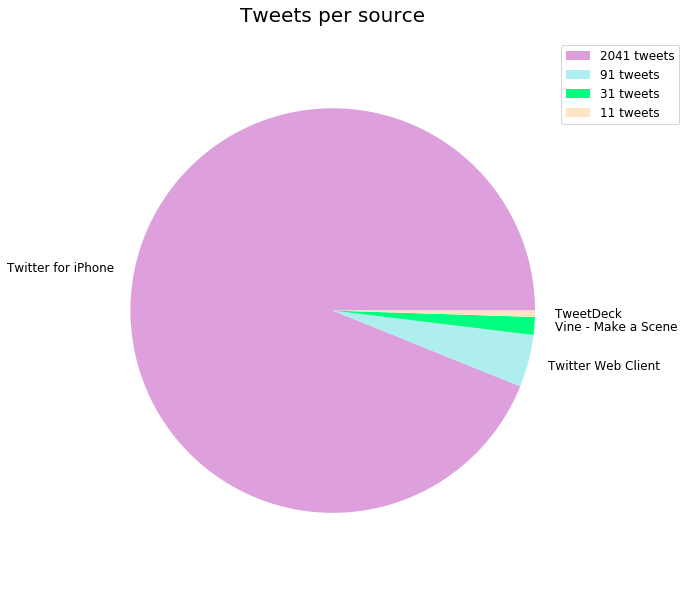

In [63]:
### Plotting data
colors = ['plum', 'paleturquoise', 'springgreen', 'bisque'] 
fig = plt.gcf()
plt.rcParams['font.size'] = 12.0
fig.set_size_inches(8, 10)
plt.pie(x=source_counts, labels=source_list, radius=15, colors=colors)
plt.title("Tweets per source", fontsize=20, y=1.02)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), labels=count_tweets_per_source);

In [64]:
### Extracting 'hour' field from the 'timestamp' column
import datetime
df_sources.timestamp = pd.to_datetime(df_sources.timestamp)
df_sources["hour"] = df_sources["timestamp"].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
### Making hour range labels
hour_ranges = ["00-03","03-06", "06-09", "09-12", "12-15", "15-18", "18-21","21-24"]

In [66]:
### Cutting 'hour' column into 8 bins
df_sources["hour_range"] = pd.cut(x=df_sources['hour'], bins=8, labels=hour_ranges)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
### Counting tweets per 'hour_range' and per 'source'
df_sources_summary = df_sources.groupby(["hour_range", "source"]).count()

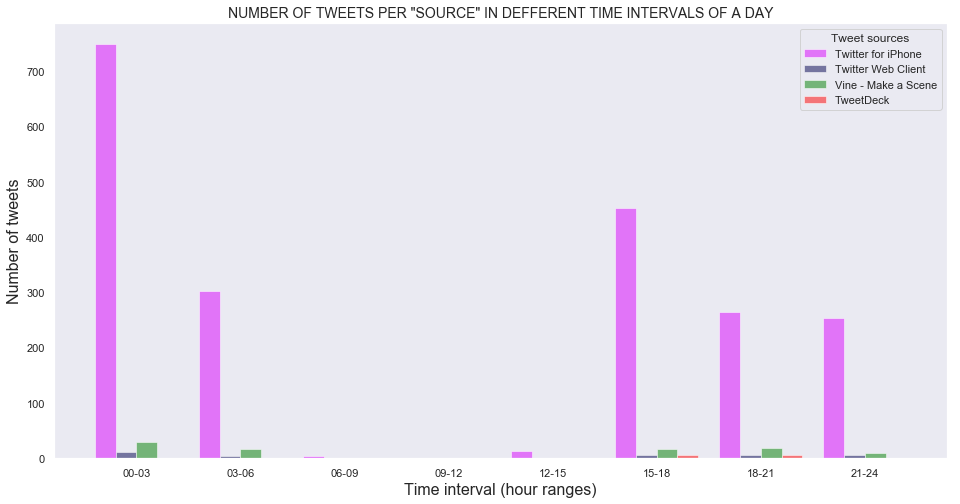

In [70]:
sns.set()
### defining bars positions and width
pos = list(range(len(df_sources_summary.query('source =="Twitter for iPhone"'))))
width = 0.2

### plotting bars
fig, ax = plt.subplots(figsize=(16,8))

plt.bar(pos, df_sources_summary.query('source =="Twitter for iPhone"')["hour"], width, alpha=0.5, color='#d900ff', \
        label= "Twitter for iPhone")
plt.bar([p + width for p in pos], df_sources_summary.query('source =="Twitter Web Client"')["hour"], width, alpha=0.5, \
        color='#00004d', label= "Twitter Web Client")
plt.bar([p + width*2 for p in pos], df_sources_summary.query('source =="Vine - Make a Scene"')["hour"], width, alpha=0.5, \
        color='green', label= "Vine - Make a Scene")
plt.bar([p + width*3 for p in pos], df_sources_summary.query('source =="TweetDeck"')["hour"], width, alpha=0.5, \
        color='red', label= "TweetDeck")


### axis labels
ax.set_ylabel('Number of tweets', fontsize = 16)
ax.set_xlabel('Time interval (hour ranges)', fontsize = 16)

### title
ax.set_title('NUMBER OF TWEETS PER "SOURCE" IN DEFFERENT TIME INTERVALS OF A DAY', fontsize = 14)

### x axis ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# x ticks labels
ax.set_xticklabels(hour_ranges)

# legend
plt.legend( title = "Tweet sources", loc='upper right')
plt.grid()
plt.show()

**It looks like most of tweets (93%) are of 'Twitter for iPhone' source. Also the above plot shows that most of tweets are made during night hours. It is noticeable that from 6 to 12 hours in the morning there are almost not tweets written. This suggests that maybe most of users are at respective work places and have not time to tweet in the morning and the afternoon.**

### Second question:
Among the tree algorithms, which one is doing better than others (i.e the algorithm that it is accurately predicting more images of dogs with higher level of confidence)?

In [71]:
### Grabbing columns needed to answer the question
df_algorithms = twitter_master[["tweet_id",'p1_dog', "p1_conf", "p2_dog", "p2_conf", "p3_dog", "p3_conf"]].query('p1_dog == \
True or p2_dog == True or p3_dog == True')

In [72]:
### Number of dog's images successfully predicted by each algorithm
print("Number of dog images predicted by FIRST algorith : {}".format(sum(df_algorithms.p1_dog)))
print("Number of dog images predicted by SECOND algorith : {}".format(sum(df_algorithms.p2_dog)))
print("Number of dog images predicted by THIRD algorith : {}".format(sum(df_algorithms.p3_dog)))

Number of dog images predicted by FIRST algorith : 1477.0
Number of dog images predicted by SECOND algorith : 1495.0
Number of dog images predicted by THIRD algorith : 1446.0


In [73]:
### Keeping confidence related columns only
df_algorithms = df_algorithms[["tweet_id", "p1_conf", "p2_conf", "p3_conf"]]

In [74]:
### Melting confidence related columns into 2 new columns: 'algorithm' and 'confidence_level'
df_algorithms_unpivoted = df_algorithms.melt(id_vars=["tweet_id"], var_name= "algorithm", value_name= "confidence_level")

In [75]:
### Updating algorithms' labels
df_algorithms_unpivoted["algorithm"] = df_algorithms_unpivoted["algorithm"].replace("p1_conf", "First")
df_algorithms_unpivoted["algorithm"] = df_algorithms_unpivoted["algorithm"].replace("p2_conf", "Second")
df_algorithms_unpivoted["algorithm"] = df_algorithms_unpivoted["algorithm"].replace("p3_conf", "Third")

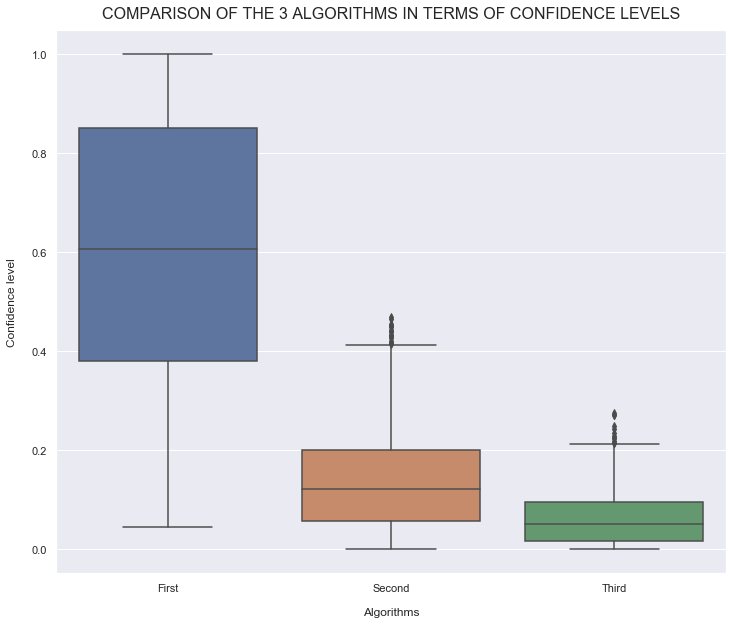

In [76]:
### Plotting algoritms' cofidence levels for comparison
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="algorithm", y="confidence_level", data=df_algorithms_unpivoted, saturation=0.65)
ax.axes.set_title("COMPARISON OF THE 3 ALGORITHMS IN TERMS OF CONFIDENCE LEVELS", fontsize=16, y=1.01)
plt.ylabel("Confidence level", labelpad=14)
plt.xlabel("Algorithms", labelpad=14);

**The first, second and third algorithms correctely predicted almost  equal number of dog images (1477, 1495 and 1446 images respectively). But when comparing their respective performance in terms of confidence level, we see that the first algorithm is doing better than the other two.  
The distribution confidence level for first algorithm varies much more than the distribution for the two other algorithms. There's a significant difference in the median confidence level for first algorithm form the two other algorithms.**

### Third question:
What is the most favorite breed of dogs? And what is the actual dog's picture favored?

In [77]:
### Grabbing columns neede to answer the question
df_favorite = twitter_master[["tweet_id", "dog_breed","favorite_count", "jpg_url"]]

### Keeping only tweets that have images
df_favorite = df_favorite[~df_favorite["jpg_url"].isnull()]

### Keeping only tweets having images predicted as DOG pictures
df_favorite = df_favorite[df_favorite["dog_breed"] != "Not a dog"]

In [78]:
### Summing up favorite counts per dog breed
df_breed_favorite = df_favorite[["dog_breed", "favorite_count"]].groupby("dog_breed").sum().sort_values("favorite_count")

In [79]:
### Keeping the first 20 most favorite dog breeds for plotting purpose
df_breed_favorite_20_first = df_breed_favorite.tail(20)

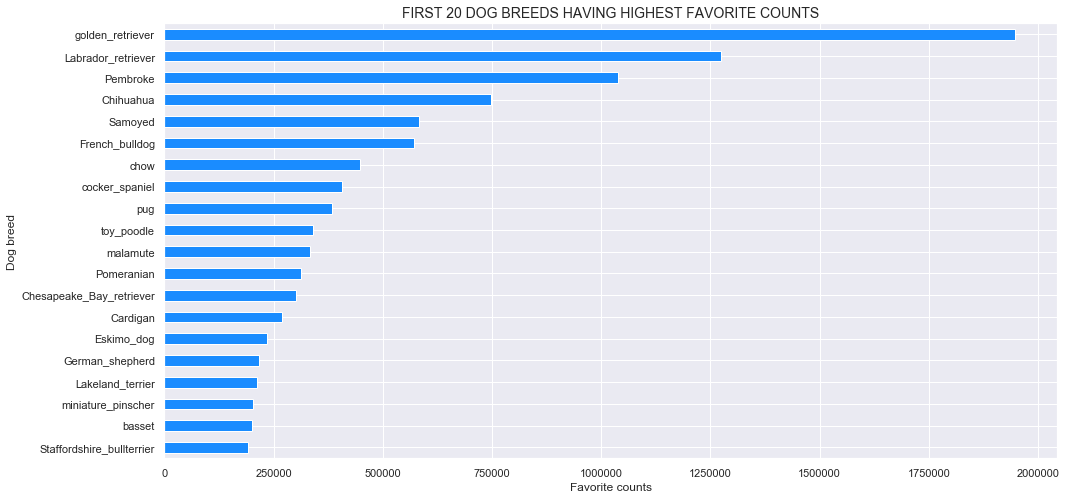

In [80]:
### Plotting First 20 dog breeds with highest favorite counts in a bar graph
sns.set()
df_breed_favorite_20_first.plot(kind = 'barh', legend=False, color = "#1a8cff", figsize = (16, 8))
plt.title('FIRST 20 DOG BREEDS HAVING HIGHEST FAVORITE COUNTS', fontsize = 14)
plt.xlabel('Favorite counts', fontsize = 12)
plt.ylabel('Dog breed', fontsize = 12);

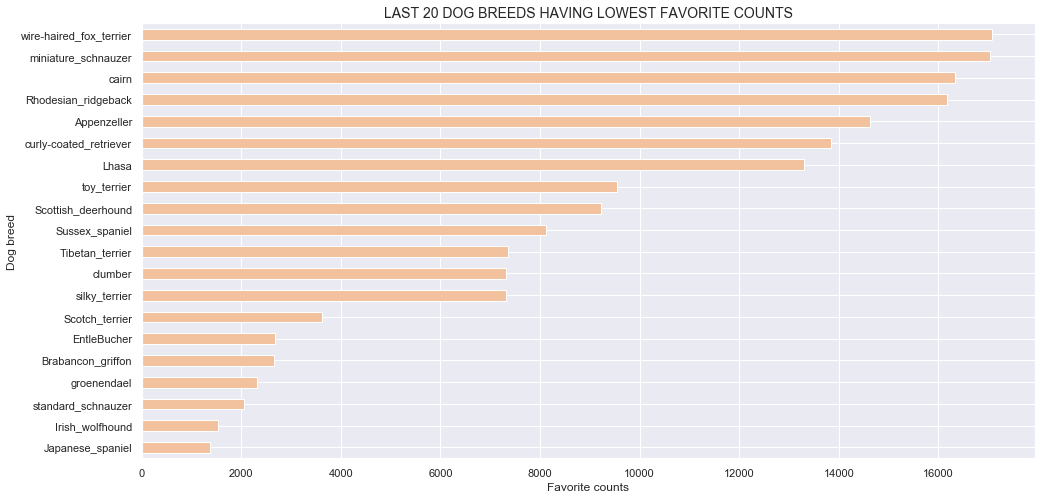

In [81]:
### Keeping the first 20 least favorite dog breeds for plotting purpose
df_breed_favorite_20_last = df_breed_favorite.head(20)
# Plotting First 20 breeds with highest favorite counts in a bar graph
sns.set()
df_breed_favorite_20_last.plot(kind = 'barh', legend=False, color = "#f2c29e", figsize = (16, 8))
plt.title('LAST 20 DOG BREEDS HAVING LOWEST FAVORITE COUNTS', fontsize = 14)
plt.xlabel('Favorite counts', fontsize = 12)
plt.ylabel('Dog breed', fontsize = 12);

#### Image of the MOST favored  dog

In [82]:
from IPython.display import Image

### Getting the row having the most favorite dog's image
df_favorite[df_favorite["favorite_count"] == df_favorite["favorite_count"].max()]

,tweet_id,dog_breed,favorite_count,jpg_url
347,822872901745569793,Lakeland_terrier,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


In [83]:
### Looking at most favorite dog's image
img_url = df_favorite.loc[df_favorite["favorite_count"] == df_favorite["favorite_count"].max()].values[0][3]
Image(url= img_url)

#### Image of the LEAST favored  dog

In [84]:
### Getting the row having the least favorite dog's image
df_favorite[df_favorite["favorite_count"] == df_favorite["favorite_count"].min()]

,tweet_id,dog_breed,favorite_count,jpg_url
2157,666102155909144576,English_setter,81,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg


In [85]:
### Looking at least favorite dog's image
img_url = df_favorite.loc[df_favorite["favorite_count"] == df_favorite["favorite_count"].min()].values[0][3]
Image(url= img_url)

**From the previous few cells, we notice that *golden_retriever* is the MOST favored breed of dogs in the dataset and *japanese_spaniel* is the LEAST favored breed.  
However the INDIVIDUAL MOST favored dog is of *Lakeland_terrier* breed while the INDIVIDUAL LEAST favored dog is of *English_setter* breed.**